# Zadanie 16.4

In [ ]:
import pandas as pd

# Wczytanie plików danych
train_data = pd.read_csv("samsung_train.txt", sep='\s+', header=None)
test_data = pd.read_csv("samsung_test.txt", sep='\s+', header=None)

# Wczytanie etykiet
train_labels = pd.read_csv("samsung_train_labels.txt", sep='\s+', header=None)
test_labels = pd.read_csv("samsung_test_labels.txt", sep='\s+', header=None)

# Wyświetlenie podstawowych informacje
print("Rozmiar danych treningowych:", train_data.shape)
print("Rozmiar danych testowych:", test_data.shape)
print("Rozmiar etykiet treningowych:", train_labels.shape)
print("Rozmiar etykiet testowych:", test_labels.shape)

Rozmiar danych treningowych: (7352, 561)
Rozmiar danych testowych: (2947, 561)
Rozmiar etykiet treningowych: (7352, 1)
Rozmiar etykiet testowych: (2947, 1)


In [2]:
# Wyświetlenie kilku pierwszych wierszy danych treningowych
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
# Unikalne etykiety
print("Etykiety w zbiorze treningowym:", train_labels[0].unique())
print("Etykiety w zbiorze testowym:", test_labels[0].unique())
print("Liczba poszczególnych etykiet w zbiorze treningowym:")
print(train_labels[0].value_counts(normalize=True))
print("Procentowy udział poszczególnych etykiet w zbiorze testowym:")
print(test_labels[0].value_counts(normalize=True))

Etykiety w zbiorze treningowym: [5 4 6 1 3 2]
Etykiety w zbiorze testowym: [5 4 6 1 3 2]
Liczba poszczególnych etykiet w zbiorze treningowym:
0
6    0.191376
5    0.186888
4    0.174918
1    0.166757
2    0.145947
3    0.134113
Name: proportion, dtype: float64
Procentowy udział poszczególnych etykiet w zbiorze testowym:
0
6    0.182219
5    0.180523
1    0.168307
4    0.166610
2    0.159824
3    0.142518
Name: proportion, dtype: float64


In [4]:
# Sprawdzenie czy w zbiorze treningowym są braki danych
print("Braki danych w zbiorze treningowym:", train_data.isna().any().any())
print("Braki danych w zbiorze testowym:", test_data.isna().any().any())

Braki danych w zbiorze treningowym: False
Braki danych w zbiorze testowym: False


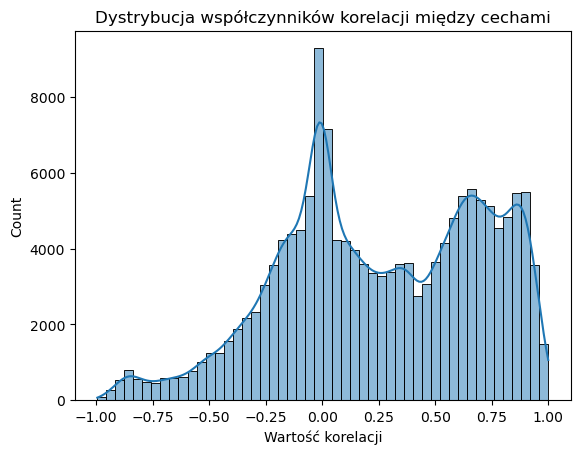

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr_distribution(data):
    corr_matrix = data.corr()
    corr_values = corr_matrix.to_numpy()[np.triu_indices_from(corr_matrix, k=1)]
    sns.histplot(corr_values, bins=50, kde=True)
    plt.title("Dystrybucja współczynników korelacji między cechami")
    plt.xlabel("Wartość korelacji")
    plt.show()

plot_corr_distribution(train_data)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=42, n_components=0.95))
], memory=None)

# Dopasowanie pipeline na zbiorze treningowym
pca_pipeline.fit(train_data)

# Transformacja zbioru treningowego
train_data_pca = pca_pipeline.transform(train_data)
print("Kształt danych treningowych po PCA:", train_data_pca.shape)

# Transformacja zbioru testowego
test_data_pca = pca_pipeline.transform(test_data)
print("Kształt danych testowych po PCA:", test_data_pca.shape)

Kształt danych treningowych po PCA: (7352, 102)
Kształt danych testowych po PCA: (2947, 102)


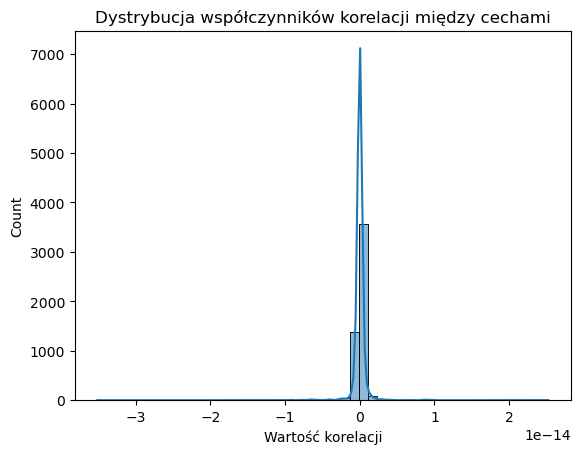

In [7]:
plot_corr_distribution(pd.DataFrame(train_data_pca))

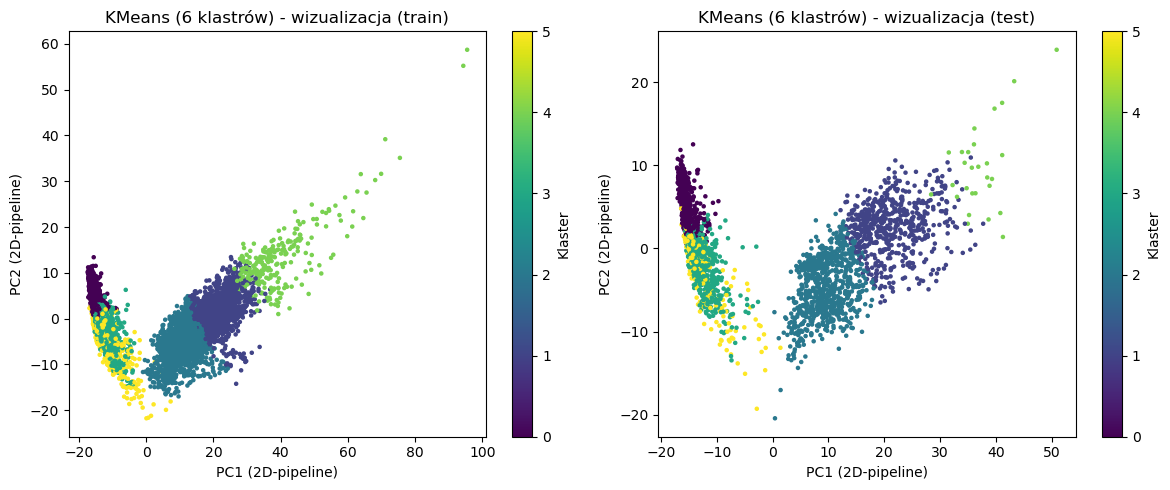

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Pipeline produkcyjny: skalowanie + PCA(0.95) + KMeans
#   (Zachowujemy 95% wariancji, a następnie przypisujemy do 6 klastrów)
prod_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca_high", PCA(n_components=0.95)),
    ("kmeans", KMeans(n_clusters=6, random_state=42))
], memory=None)

# Dopasowanie pipeline do X_train
prod_pipeline.fit(train_data)

# Przypisanie klastrów na train i test
train_clusters = prod_pipeline.predict(train_data)
test_clusters  = prod_pipeline.predict(test_data)

# 2. Pipeline wizualizacyjny: skalowanie + PCA(2)
#    (Tylko do rysowania w 2D - nie jest używany w KMeans)
vis_pipeline_2d = Pipeline([
    ("scaler", StandardScaler()),
    ("pca2d", PCA(n_components=2))
], memory=None)

vis_pipeline_2d.fit(train_data)

# Transformacje do 2D
X_train_2D = vis_pipeline_2d.transform(train_data)
X_test_2D  = vis_pipeline_2d.transform(test_data)

# Wizualizacja w 2D
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sc1 = axes[0].scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=train_clusters, cmap="viridis", s=5)
axes[0].set_title("KMeans (6 klastrów) - wizualizacja (train)")
fig.colorbar(sc1, ax=axes[0], label="Klaster")
axes[0].set_xlabel("PC1 (2D-pipeline)")
axes[0].set_ylabel("PC2 (2D-pipeline)")

sc2 = axes[1].scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=test_clusters, cmap="viridis", s=5)
axes[1].set_title("KMeans (6 klastrów) - wizualizacja (test)")
fig.colorbar(sc2, ax=axes[1], label="Klaster")
axes[1].set_xlabel("PC1 (2D-pipeline)")
axes[1].set_ylabel("PC2 (2D-pipeline)")

plt.tight_layout()
plt.show()

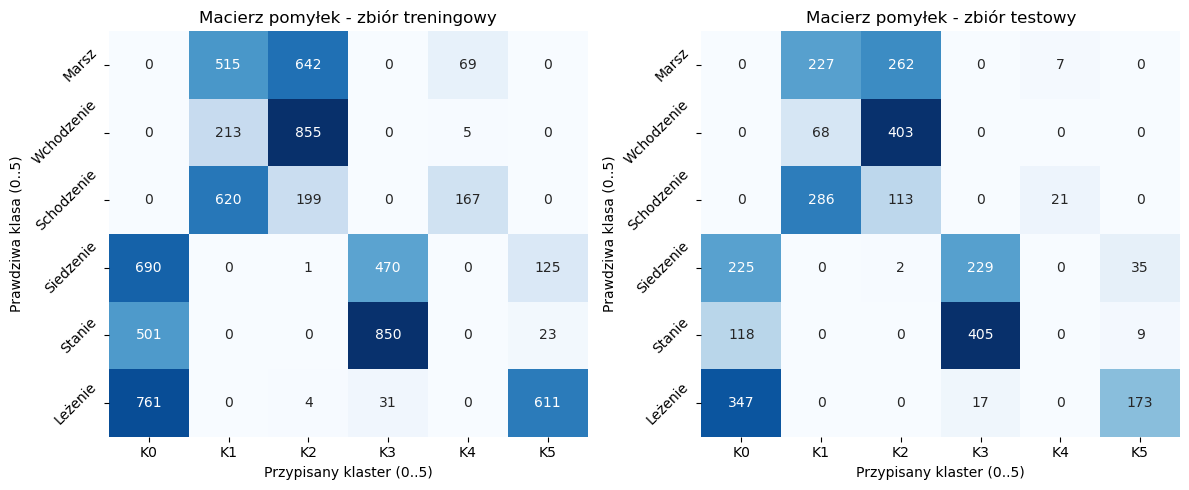

In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Przypisany klaster (0..5)")
    ax.set_ylabel("Prawdziwa klasa (0..5)")
    ax.set_xticks(np.arange(6)+0.5)
    ax.set_yticks(np.arange(6)+0.5)
    ax.set_xticklabels(["K0","K1","K2","K3","K4","K5"])
    ax.set_yticklabels(["Marsz", "Wchodzenie", "Schodzenie", "Siedzenie", "Stanie", "Leżenie"], rotation=45)

# Przygotowanie etykiet (przesunięcie 1..6 => 0..5)
y_true_train = train_labels.to_numpy().ravel() - 1
y_pred_train = train_clusters

y_true_test = test_labels.to_numpy().ravel() - 1
y_pred_test = test_clusters

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_confusion(axes[0], y_true_train, y_pred_train, "Macierz pomyłek - zbiór treningowy")
plot_confusion(axes[1], y_true_test, y_pred_test, "Macierz pomyłek - zbiór testowy")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

# Wydobywamy z pipeline ztransformowane dane (skalowanie + PCA)
X_train_transformed = prod_pipeline[:-1].transform(train_data)

# Pobieramy przypisania klastrów z KMeans
train_clusters = prod_pipeline.named_steps["kmeans"].labels_

# Liczymy silhouette score (wyższy = lepsza separacja klastrów)
silhouette_train = silhouette_score(X_train_transformed, train_clusters)
print("Silhouette score (train):", silhouette_train)

# Testujemy na zbiorze testowym
X_test_transformed = prod_pipeline[:-1].transform(test_data)
test_clusters = prod_pipeline.predict(test_data)

silhouette_test = silhouette_score(X_test_transformed, test_clusters)
print("Silhouette score (test):", silhouette_test)

Silhouette score (train): 0.12103414107468934
Silhouette score (test): 0.13456630130438746


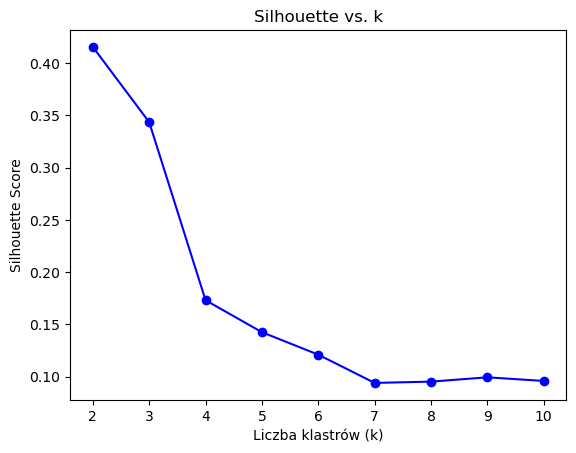

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

sil_scores = []
k_values = range(2, 11)

for k in k_values:
    # Ustaw liczbę klastrów w kroku "kmeans" pipeline'u
    prod_pipeline.set_params(kmeans__n_clusters=k)
    
    # Fit na train_data
    prod_pipeline.fit(train_data)
    
    # Wydobywamy przetransformowane dane
    X_train_transformed = prod_pipeline[:-1].transform(train_data)
    
    # Etykiety klastrów
    labels = prod_pipeline.named_steps["kmeans"].labels_
    
    # Silhouette score
    sil = silhouette_score(X_train_transformed, labels)
    sil_scores.append(sil)

plt.plot(k_values, sil_scores, "bo-")
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs. k")
plt.show()

### Wnioski z Klastrowania metodą `KMeans`:

- Czy potrzeba wszystkich cech?

Wykonałem analizę wariancji dzięki czemu zachowując ją na poziomie 95% można było obniżyć liczbę cech z 560 na 102.

- Czy potrzebna jest jakaś obróbka?

Dane zostały przeskalowane z użyciem `StandardScaler()` oraz `PCA`

- Czy wiemy, co jaka cecha znaczy?

Dane zostały oznaczone tylko liczbami, nie znamy ich semantycznego znaczenia.

- Czy potrzebujemy aż dwóch plików? Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?

W unsupervised learning nie potrzebujemy dwóch odzielnych plików pomaga to jednak sprawdzić zachowanie modelu w kontekście eksperymentowania z różnymi algorytmami. Oraz co zakłada dalsza część zadania pozwoli na ocenę jak klastering poprawi klasyfikację. Dane są podzielone proporcjonalnie z odchyleniem o 1-2%, więc nie było to potrzebne i ma minimalny wpływ na całokształt eksperymentów.

- Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej?

Jak widać na confusion matrix, nie wiemy którym klastrem jest która konkretnie czynność ale wiemy jaką czynnością są klasy wobec których sprawdzamy przypisane przez KMeans klastry. Widać wyraźne grupowanie czynności dynamicznych i czynności statycznych w obrębie tych samych klastrów, jednakże algorytm nie jest rozdziela tych czynności dokładniej.

- Podsumowanie:

Model jest stabilny - widać to przy porównaniu treningowej i testowej części danych, Po wizualizacji 2D i metryce Silhouette Score widać, że algorytm wykrył pewne zależności w danych, jednakże nie jest w stanie ich rozdzielić całkowicie zgodnie ze znaczeniem. Jest to wielowymiarowy dataset i to może być głównym wyzwaniem.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Prygotowanie danych (połączenie zbiorów treningowego i testowego)
all_data = pd.concat([train_data, test_data], ignore_index=True)
print("Rozmiar danych po połączeniu:", all_data.shape)

Rozmiar danych po połączeniu: (10299, 561)


In [13]:
# Standaryzacja danych i PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(all_data)
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)
print("Rozmiar danych po PCA:", data_pca.shape)

def dbscan_clustering_analysis(data_pca, eps_range, min_samples_range, metric, results):
    for eps_val in eps_range:
        for min_s in min_samples_range:
            dbscan = DBSCAN(eps=eps_val, min_samples=min_s, metric=metric)
            labels = dbscan.fit_predict(data_pca)
        
            unique_labels = set(labels)
            n_clusters = len(unique_labels - {-1})
        
            if n_clusters > 1:
                mask = (labels != -1)
                sil = silhouette_score(data_pca[mask], labels[mask])
                outliers_count = np.sum(labels == -1)
                outliers_ratio = outliers_count / len(labels)
            else:
                sil = None
                outliers_count = None
                outliers_ratio = None
        
            results.append({
            'eps': eps_val,
            'min_samples': min_s,
            'n_clusters': n_clusters,
            'silhouette': sil,
            'outliers_count': outliers_count,
            'outliers_ratio': outliers_ratio
        })


Rozmiar danych po PCA: (10299, 104)


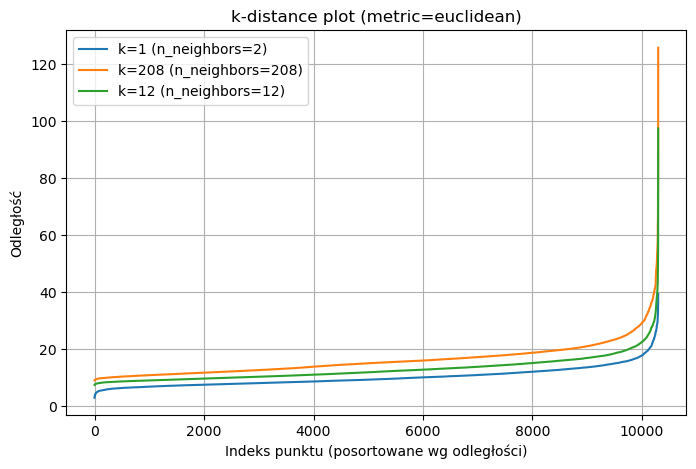

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_kdistances(data_pca, metric, custom_n_neighbors):
    n_features = data_pca.shape[1]

    # 1) k=1 (n_neighbors=2)
    neigh2 = NearestNeighbors(n_neighbors=2, metric=metric)
    neigh2.fit(data_pca)
    dist2, idx2 = neigh2.kneighbors(data_pca)
    dist2_sorted = np.sort(dist2[:, 1])

    # 2) k = n_features*2
    neigh2f = NearestNeighbors(n_neighbors=n_features * 2, metric=metric)
    neigh2f.fit(data_pca)
    dist2f, idx2f = neigh2f.kneighbors(data_pca)
    dist2f_sorted = np.sort(dist2f[:, (n_features * 2) - 1])

    # 3) k=custom
    neigh_custom = NearestNeighbors(n_neighbors=custom_n_neighbors, metric=metric)
    neigh_custom.fit(data_pca)
    dist_custom, idx_custom = neigh_custom.kneighbors(data_pca)
    dist_custom_sorted = np.sort(dist_custom[:, custom_n_neighbors - 1])

    plt.figure(figsize=(8, 5))
    plt.plot(dist2_sorted, label="k=1 (n_neighbors=2)")
    plt.plot(
        dist2f_sorted,
        label=f"k={n_features * 2} (n_neighbors={n_features * 2})"
    )
    plt.plot(
        dist_custom_sorted,
        label=f"k={custom_n_neighbors} (n_neighbors={custom_n_neighbors})"
    )
    plt.title(f"k-distance plot (metric={metric})")
    plt.xlabel("Indeks punktu (posortowane wg odległości)")
    plt.ylabel("Odległość")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_kdistances(data_pca, metric="euclidean", custom_n_neighbors=12)

In [15]:
eps_range = [11, 12, 13, 14, 15, 16]      # zakres eps
min_samples_range = [15, 16, 17, 18, 19, 20, 21, 22, 23] # zakres min_samples
metric = 'euclidean' # metryka
results = []
dbscan_clustering_analysis(data_pca, eps_range, min_samples_range, metric, results)

results_df = pd.DataFrame(results)

In [16]:
subset_df = results_df.query("5 <= n_clusters <= 7").sort_values("silhouette", ascending=False)
subset_df


,eps,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
5,11,20,7,0.394729,5458.0,0.529954
4,11,19,7,0.393696,5414.0,0.525682
14,12,20,5,0.372010,4218.0,0.409554
13,12,19,5,0.370737,4180.0,0.405865
10,12,16,6,0.365336,4034.0,0.391689
24,13,21,5,0.354807,3214.0,0.312069
12,12,18,6,0.352769,4138.0,0.401787
22,13,19,5,0.352471,3129.0,0.303816
9,12,15,7,0.352415,3982.0,0.386639
11,12,17,6,0.351550,4106.0,0.398679


Dla szcześciu klastrów, których szukamy pojawia się bardzo dużo outlierów. Silhouette tego nie rekompensuje. Spróbujmy jeszcze zmniejszyć wymiarowość lub zastosować inną metric.

In [17]:
pca0_80 = PCA(n_components = 0.80)
data_pca0_80 = pca0_80.fit_transform(data_scaled)
print("Rozmiar danych po PCA (80% wariancji):", data_pca0_80.shape)

Rozmiar danych po PCA (80% wariancji): (10299, 27)


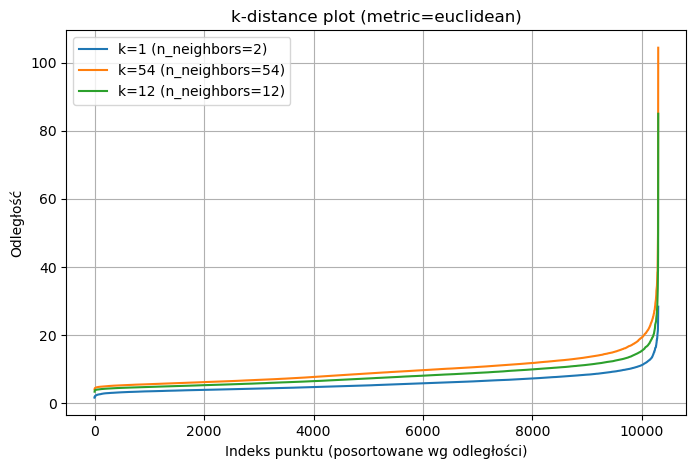

In [18]:
plot_kdistances(data_pca0_80, metric="euclidean", custom_n_neighbors=12)

In [19]:
eps_range = [4,5,6,7,8,9,10,11,12,13,14,15,20]      # zakres eps
min_samples_range = [3, 4, 5, 6, 7, 8] # zakres min_samples
metric = 'euclidean' # metryka
results = []
dbscan_clustering_analysis(data_pca0_80, eps_range, min_samples_range, metric, results)

# Wyniki do DataFrame
results_df = pd.DataFrame(results)

In [20]:
subset_df = results_df.query("5 <= n_clusters <= 7").sort_values("silhouette", ascending=False)
subset_df

,eps,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
54,13,3,6,0.252424,166.0,0.016118
48,12,3,7,0.251225,259.0,0.025148
38,10,5,5,0.234077,807.0,0.078357
39,10,6,5,0.224737,869.0,0.084377
49,12,4,5,0.208770,284.0,0.027575
11,5,8,7,-0.060201,7149.0,0.694145


Pierwszy wynik wygląda obiecująco, zróbmy więc wizualizację

Liczba klastrów (bez -1): 6
Silhouette score: 0.24287562285083658
Liczba outlierów: 166
Procentowy udział outlierów: 0.01611806971550636
Klaster 0: 10115 obserwacji
Klaster 1: 4 obserwacji
Klaster 2: 3 obserwacji
Klaster 3: 3 obserwacji
Klaster 4: 3 obserwacji
Klaster 5: 5 obserwacji


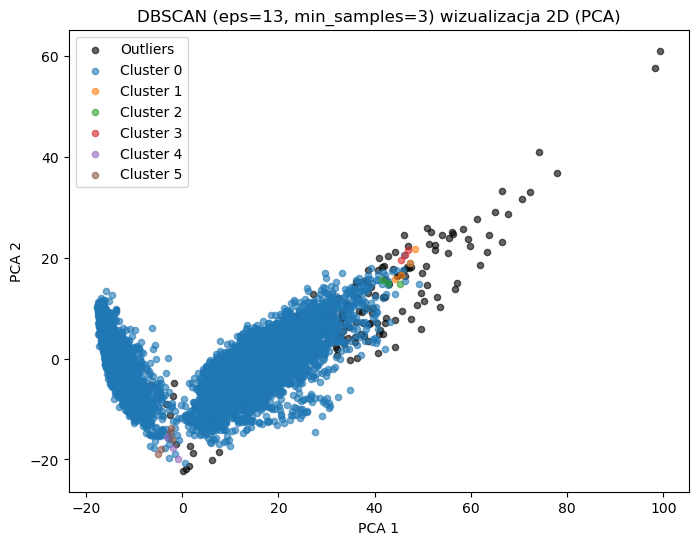

In [21]:
# Klastrowanie DBSCAN z eps=13, min_samples=3
dbscan = DBSCAN(eps=13, min_samples=3, metric='euclidean')
labels = dbscan.fit_predict(data_pca0_80)

# Sprawdźmy jeszcze raz metryki dla wybranego modelu
unique_labels = set(labels)
n_clusters = len(unique_labels - {-1})
print("Liczba klastrów (bez -1):", n_clusters)
silhouette = silhouette_score(data_pca0_80, labels)
print("Silhouette score:", silhouette)
outliers_count = np.sum(labels == -1)
outliers_ratio = outliers_count / len(labels)
print("Liczba outlierów:", outliers_count)
print("Procentowy udział outlierów:", outliers_ratio)

# Policzmy liczebności klastrów
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue
    cluster_mask = (labels == cluster_id)
    cluster_size = np.sum(cluster_mask)
    print(f"Klaster {cluster_id}: {cluster_size} obserwacji")


# Dodatkowe PCA do 2 wymiarów WYŁĄCZNIE DLA WIZUALIZACJI
pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_pca0_80)

# 3. Rysowanie punktów w 2D
plt.figure(figsize=(8, 6))

# Zaznaczmy najpierw outliers (etykieta = -1) w kolorze czarnym
outlier_mask = (labels == -1)
plt.scatter(
    data_2d[outlier_mask, 0],
    data_2d[outlier_mask, 1],
    c='black',
    s=20,
    alpha=0.6,
    label='Outliers'
)

# Następnie każdy klaster w innym kolorze
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue
    cluster_mask = (labels == cluster_id)
    plt.scatter(
        data_2d[cluster_mask, 0],
        data_2d[cluster_mask, 1],
        s=20,
        alpha=0.6,
        label=f'Cluster {cluster_id}'
    )

plt.title("DBSCAN (eps=13, min_samples=3) wizualizacja 2D (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

Dane zbite są w jedną dużą chmurę, to nie jest to czego szukamy. Spróbujmy więc jeszcze innej metric.

In [22]:
from sklearn.preprocessing import normalize

data_norm = normalize(data_scaled, norm='l2', axis=1)
data_norm_pca = pca0_80.fit_transform(data_norm)
data_norm_pca.shape

(10299, 29)

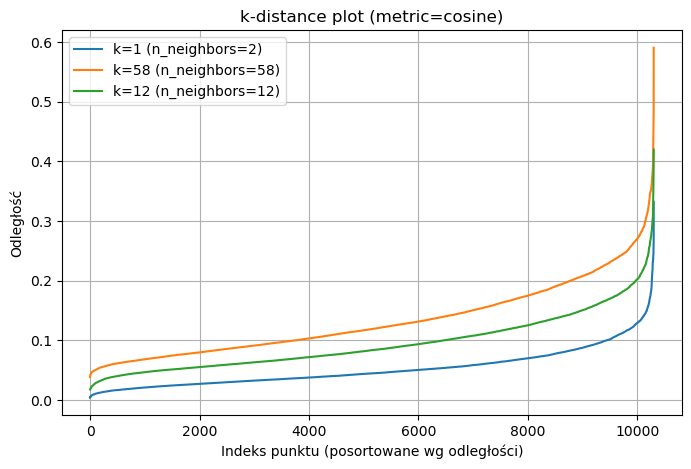

In [23]:
plot_kdistances(data_norm_pca, metric="cosine", custom_n_neighbors=12)

In [24]:
eps_range = np.arange(0.1, 0.15, 0.01)
min_samples_range = np.arange(3, 13)
metric = 'cosine'
results = []
dbscan_clustering_analysis(data_norm_pca, eps_range, min_samples_range, metric, results)

# Wyniki do DataFrame
results_df = pd.DataFrame(results)

In [25]:
results_df.query("n_clusters == 6 and outliers_count < 1500")

,eps,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
13,0.11,6,6,0.173740,1253,0.121662
17,0.11,10,6,0.228700,1499,0.145548
31,0.13,4,6,0.234539,494,0.047966


Liczba klastrów (bez -1): 6
Klaster 0: 4558 obserwacji
Klaster 1: 68 obserwacji
Klaster 2: 4067 obserwacji
Klaster 3: 49 obserwacji
Klaster 4: 36 obserwacji
Klaster 5: 22 obserwacji
Silhouette score: 0.2081874365978189
Liczba outlierów: 1499
Procentowy udział outlierów: 0.14554811146713273


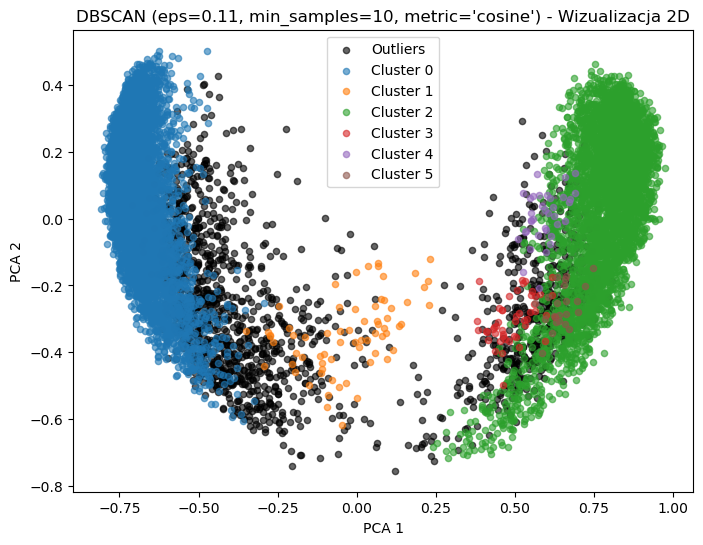

In [26]:
# DBSCAN z eps=0.11 i min_samples=10 na danych znormalizowanych (metric='cosine')
dbscan = DBSCAN(eps=0.11, min_samples=10, metric='cosine')
labels = dbscan.fit_predict(data_norm_pca)

# Liczba klastrów (bez etykiety -1)
unique_labels = set(labels)
n_clusters = len(unique_labels - {-1})
print("Liczba klastrów (bez -1):", n_clusters)

# Liczba obserwacji w klastrach
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue
    cluster_mask = (labels == cluster_id)
    cluster_size = np.sum(cluster_mask)
    print(f"Klaster {cluster_id}: {cluster_size} obserwacji")

# Silhouette score
mask = (labels != -1)
sil = silhouette_score(data_norm[mask], labels[mask])
print("Silhouette score:", sil)

# Outliery
outliers_count = np.sum(labels == -1)
outliers_ratio = outliers_count / len(labels)
print("Liczba outlierów:", outliers_count)
print("Procentowy udział outlierów:", outliers_ratio)

# PCA do 2 wymiarów do wizualizacji
pca_2d = PCA(n_components=2)
data_norm_2d = pca_2d.fit_transform(data_norm_pca)

# Rysujemy w 2D
plt.figure(figsize=(8, 6))

# Najpierw outliers
outlier_mask = (labels == -1)
plt.scatter(
    data_norm_2d[outlier_mask, 0],
    data_norm_2d[outlier_mask, 1],
    c="black",
    s=20,
    alpha=0.6,
    label="Outliers"
)

# Potem klastry
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue
    cluster_mask = (labels == cluster_id)
    plt.scatter(
        data_norm_2d[cluster_mask, 0],
        data_norm_2d[cluster_mask, 1],
        s=20,
        alpha=0.6,
        label=f"Cluster {cluster_id}"
    )

plt.title("DBSCAN (eps=0.11, min_samples=10, metric='cosine') - Wizualizacja 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

### Wnioski z Klastrowania metodą `DBSCAN`:

- Czy potrzeba wszystkich cech?

Eksperymentowałem z różnymi wariancjami, 0.95, oraz 0.80, które dało 27 wymiarów, czyli w górnej granicy, która jest polecana dla `DBSCAN`.

- Czy potrzebna jest jakaś obróbka?

Dane zostały przeskalowane z użyciem `StandardScaler()` oraz `PCA`, a dla `metric='cosine'` znormalizowane.

- Czy potrzebujemy aż dwóch plików? Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?

Dla `DBSCAN` tym razem połączyłem wszystkie dane. Nie da się ocenić jakości modelu używając zestawu testowego z uwagi na sposób jego działania.

- Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej?

Tak jak i poprzednio po eksperymentach widać podział na dwa wyraźne klastry. Dedukuję, że jeden jest dla czynności statycznych, a drugi dla dynamicznych.

- Podsumowanie:

Niezależnie od przyjętych parametrów model nie sprawdził się w klasteryzacji na tym zbiorze danych. Dane w najlepszym wypadku skupiają się w 2 duże klastry. Spróbujmy teraz HDBSCAN.

In [41]:
import hdbscan

def hdbscan_clustering_experiments(data, min_cluster_size_list, min_samples_list, \
                                   metric, algorithm, cluster_selection_method):
    print(f"Running HDBSCAN experiments for metric={metric}, algorithm={algorithm}, cluster_selection_method={cluster_selection_method}")
    print(f"min_cluster_size_list={min_cluster_size_list}, min_samples_list={min_samples_list}")
    results = []
    for mcs in min_cluster_size_list:
        for ms in min_samples_list:
            hdbs = hdbscan.HDBSCAN(
                min_cluster_size=mcs,
                min_samples=ms,
                metric=metric,
                cluster_selection_epsilon=0.0,
                gen_min_span_tree=True,
                algorithm=algorithm,
                cluster_selection_method=cluster_selection_method
            )

            labels = hdbs.fit_predict(data)
            unique_labels = set(labels)
            n_clusters = len(unique_labels - {-1})
            outliers_count = (labels == -1).sum()
            outliers_ratio = outliers_count / len(labels)

            sil = None
            if n_clusters > 1:
                mask = (labels != -1)
                sil = silhouette_score(data[mask], labels[mask])

            results.append({
                'min_cluster_size': mcs,
                'min_samples': ms,
                'n_clusters': n_clusters,
                'silhouette': sil,
                'outliers_count': outliers_count,
                'outliers_ratio': outliers_ratio
            })
    return results

In [42]:
data = data_pca0_80
min_cluster_size_list = np.arange(2, 30)
min_samples_list = np.arange(2, 30)
metric = 'euclidean'
algorithm = 'best'
cluster_selection_method = 'eom'
results = []

results = hdbscan_clustering_experiments(data, min_cluster_size_list, min_samples_list, \
                                         metric, algorithm, cluster_selection_method)

results_df = pd.DataFrame(results)
results_df.query("5 <= n_clusters <= 7").sort_values("silhouette", ascending=False)

Running HDBSCAN experiments for metric=euclidean, algorithm=best, cluster_selection_method=eom
min_cluster_size_list=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29], min_samples_list=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


,min_cluster_size,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
70,4,16,5,0.469171,2339,0.227109
42,3,16,5,0.469171,2339,0.227109
235,10,13,5,0.466101,3621,0.351588
263,11,13,5,0.466101,3621,0.351588
204,9,10,5,0.465786,2370,0.230119
...,...,...,...,...,...,...
756,29,2,6,0.394164,2825,0.274298
9,2,11,7,0.393945,1611,0.156423
35,3,9,6,0.393048,1452,0.140985
7,2,9,6,0.393048,1452,0.140985


In [ ]:
# df with only n_clusters = 6, outliers < 4000, silhouette > 0.4
subset_df = results_df.query("n_clusters == 6 and outliers_count < 4000 and silhouette > 0.4")

In [44]:
subset_df 

,min_cluster_size,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
18,2,20,6,0.445486,2589,0.251384
40,3,14,6,0.444748,2579,0.250413
41,3,15,6,0.449592,2659,0.258180
64,4,10,6,0.438033,2397,0.232741
68,4,14,6,0.444748,2579,0.250413
92,5,10,6,0.438033,2397,0.232741
96,5,14,6,0.444748,2579,0.250413
120,6,10,6,0.438033,2397,0.232741
121,6,11,6,0.438087,2449,0.237790
148,7,10,6,0.438033,2397,0.232741


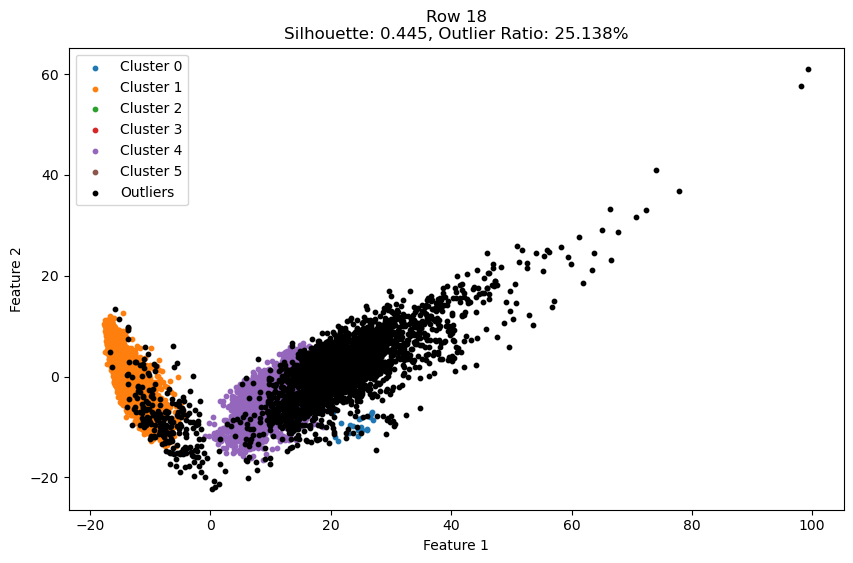

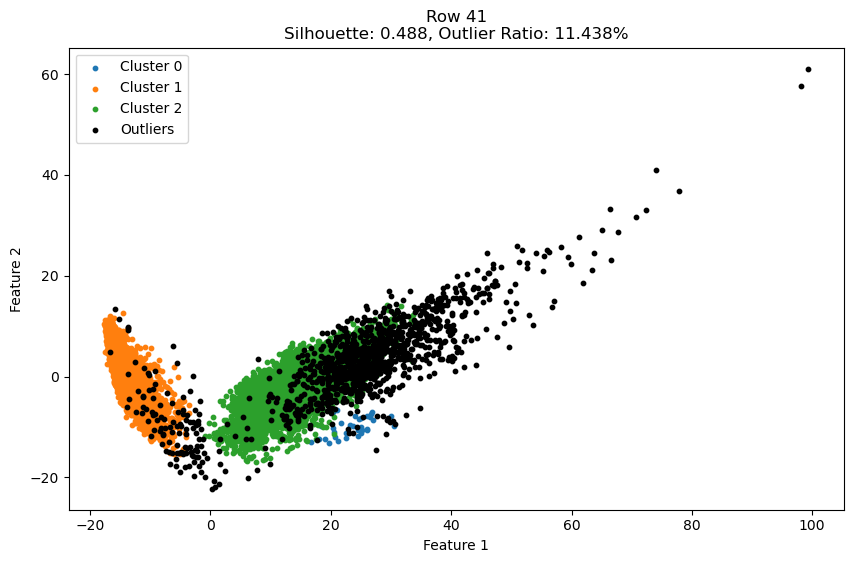

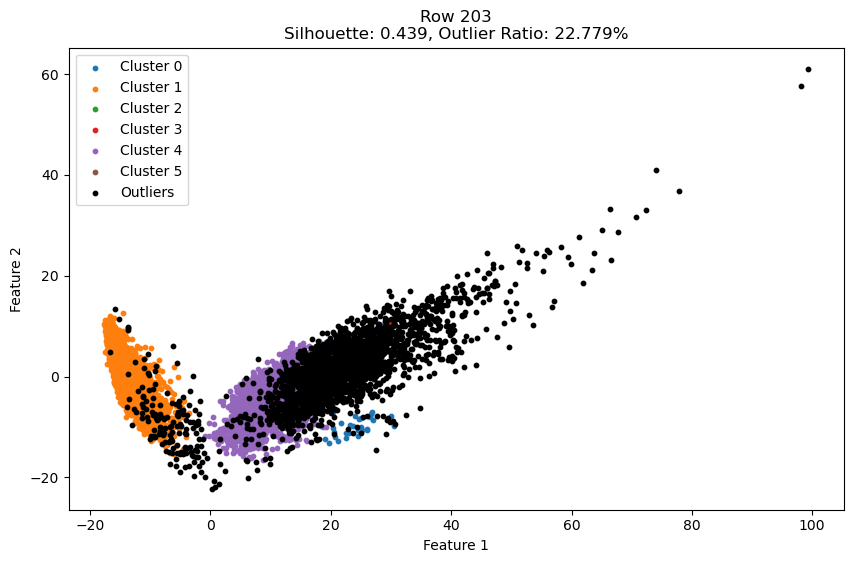

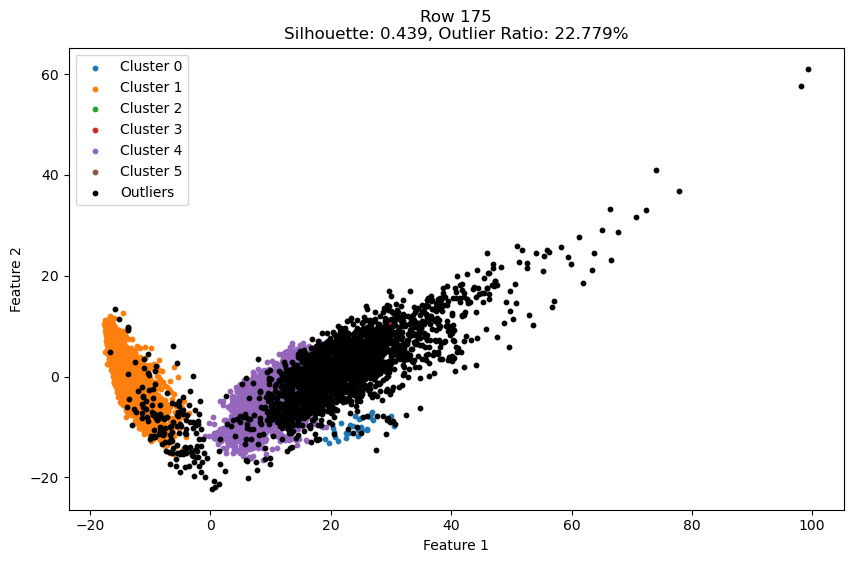

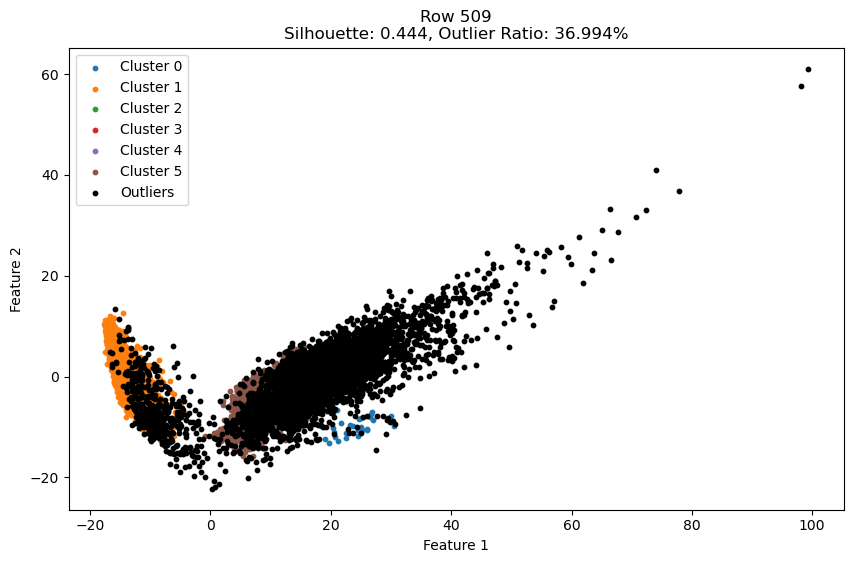

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_clusters(data, labels, title, silhouette, outlier_ratio):
    unique_labels = set(labels)
    colors = sns.color_palette("tab10", len(unique_labels))
    plt.figure(figsize=(10, 6))
    
    for label, color in zip(unique_labels, colors):
        if label == -1:
            color = "black"
        mask = (labels == label)
        plt.scatter(data[mask, 0], data[mask, 1], s=10, c=[color], label=f"Cluster {label}" if label != -1 else "Outliers")

    plt.title(f"{title}\nSilhouette: {silhouette:.3f}, Outlier Ratio: {outlier_ratio:.3%}")
    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize top configurations
for config in [(2, 20, "Row 18"), (15, 6, "Row 41"), (9, 9, "Row 203"), (8, 9, "Row 175"), (20, 7, "Row 509")]:
    mcs, ms, title = config
    hdbs = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms, metric='euclidean',
                           cluster_selection_method='eom', algorithm='best')
    labels = hdbs.fit_predict(data)
    silhouette = silhouette_score(data[labels != -1], labels[labels != -1]) if len(set(labels)) > 1 else None
    outlier_ratio = (labels == -1).sum() / len(labels)
    visualize_clusters(data, labels, title, silhouette, outlier_ratio)


In [47]:
data = data_norm_pca
min_cluster_size_list = np.arange(2, 30)
min_samples_list      = np.arange(2, 30)
metric                = 'cosine'
algorithm             = 'generic'
cluster_selection_method = 'eom'

results = hdbscan_clustering_experiments(data,
                                         min_cluster_size_list,
                                         min_samples_list,
                                         metric,
                                         algorithm,
                                         cluster_selection_method)

results_df = pd.DataFrame(results)
filtered_df = (results_df
               .query("5 <= n_clusters <= 7")
               .sort_values("silhouette", ascending=False))

Running HDBSCAN experiments for metric=cosine, algorithm=generic, cluster_selection_method=eom
min_cluster_size_list=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29], min_samples_list=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


In [48]:
filtered_df

,min_cluster_size,min_samples,n_clusters,silhouette,outliers_count,outliers_ratio
620,24,6,5,0.292923,2566,0.249150
702,27,4,5,0.279553,2269,0.220313
730,28,4,5,0.279553,2269,0.220313
758,29,4,5,0.279553,2269,0.220313
113,6,3,5,0.277316,1297,0.125935
86,5,4,5,0.274927,1434,0.139237
21,2,23,6,0.271385,1209,0.117390
85,5,3,6,0.269448,1309,0.127100
30,3,4,7,0.267621,1442,0.140014
15,2,17,6,0.255468,1174,0.113992


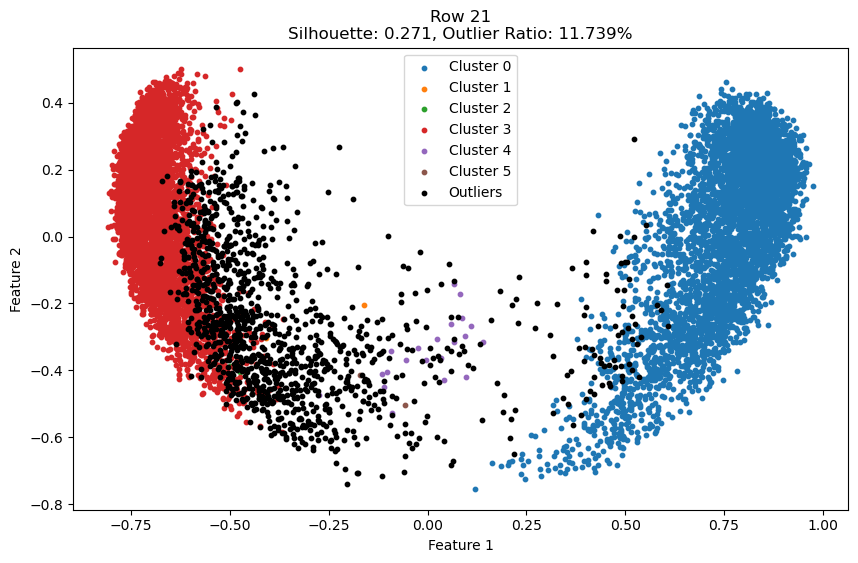

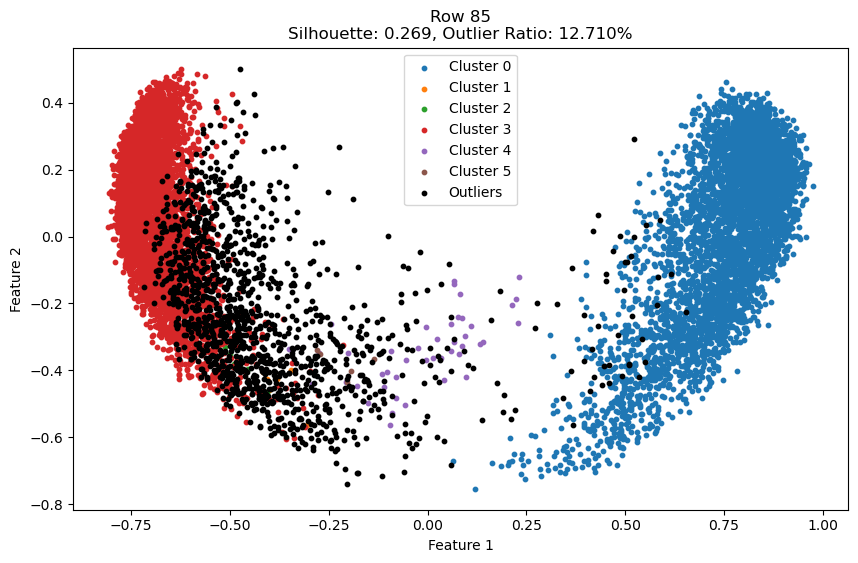

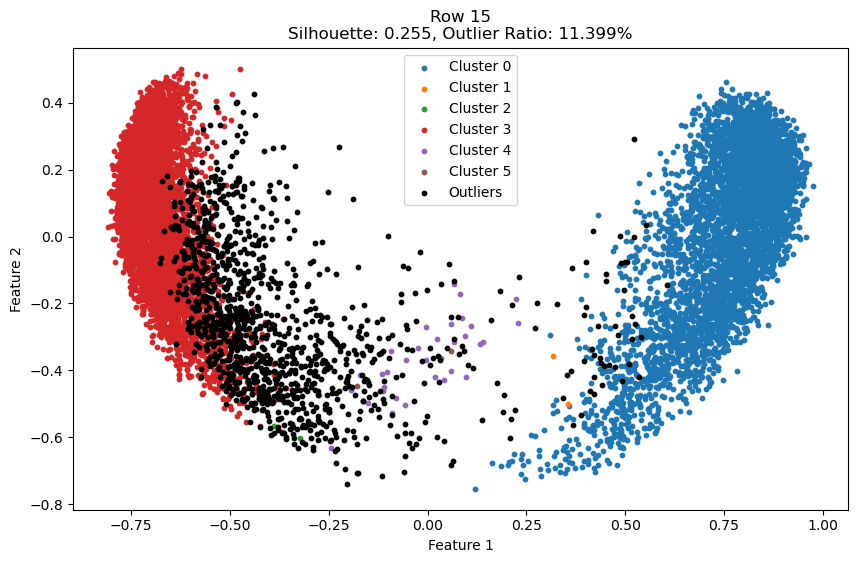

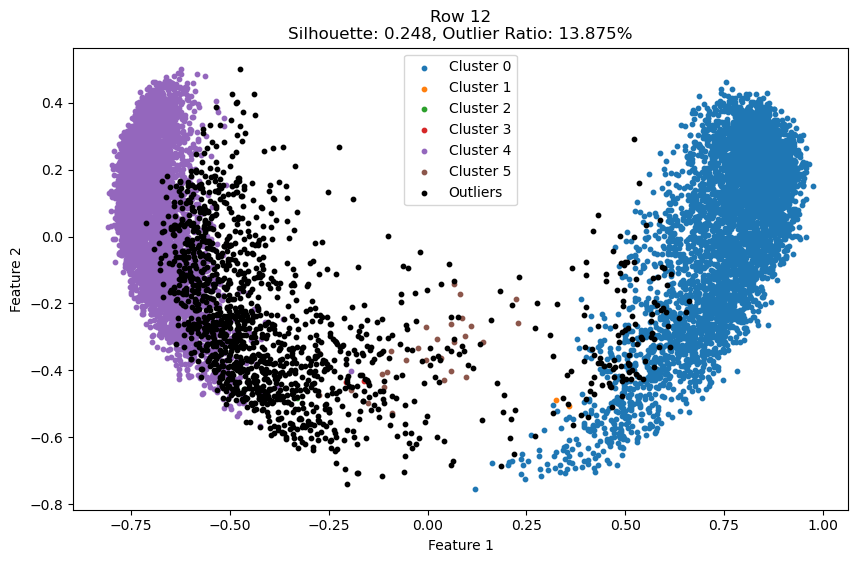

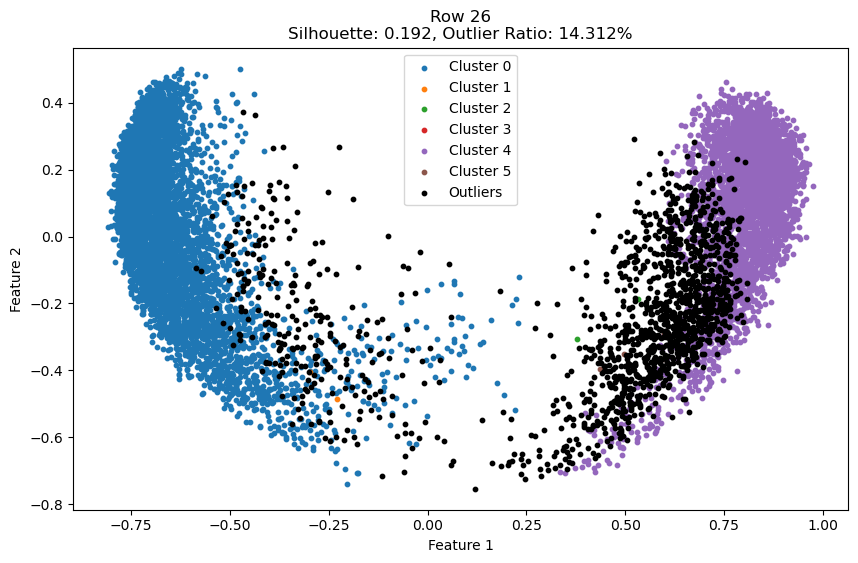

In [49]:
for config in [(2, 23, "Row 21"), (5, 3, "Row 85"), (2, 17, "Row 15"), (2, 14, "Row 12"), (2, 28, "Row 26")]:
    mcs, ms, title = config
    hdbs = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=ms, metric='cosine',
                           cluster_selection_method='eom', algorithm='generic')
    labels = hdbs.fit_predict(data)
    silhouette = silhouette_score(data[labels != -1], labels[labels != -1]) if len(set(labels)) > 1 else None
    outlier_ratio = (labels == -1).sum() / len(labels)
    visualize_clusters(data, labels, title, silhouette, outlier_ratio)

### Wnioski po użyciu `HDBSCAN`

Postanowiłem przeszukać wiele parametrów metodą brute force z uwagi na szybkość tej metody.

Zarówno przy użyciu `cosine` jak i `euclidian` widać tylko 2 wyraźne klastry.

In [74]:
from sklearn.mixture import GaussianMixture

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D

In [75]:
X_80 = data_pca0_80
y = np.concatenate([train_labels, test_labels], axis=0).ravel()

print("X_80 shape:", X_80.shape)
print("y shape:", y.shape)

X_80 shape: (10299, 27)
y shape: (10299,)


In [76]:
def fit_gaussian_mixture(covariance_type):
    n_components = 6  # wiemy, że w HAR jest 6 klas aktywności
    gm = GaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        max_iter=200,
        n_init=10,
        random_state=42
    )
    gm.fit(X_80)
    cluster_labels = gm.predict(X_80)
    return cluster_labels

In [77]:
def clustering_evaluation(y, cluster_labels):
    ari = adjusted_rand_score(y, cluster_labels)
    nmi = normalized_mutual_info_score(y, cluster_labels)
    print(f"ARI  (Adjusted Rand Index) = {ari:.4f}")
    print(f"NMI (Normalized Mutual Info) = {nmi:.4f}")

    cm = confusion_matrix(y, cluster_labels)
    cm_fixed = cm[1:, :-1]
    print("Confusion matrix (klasy vs klaster):")
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_fixed)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix (rows=true labels, cols=cluster labels)")
    plt.show()


ARI  (Adjusted Rand Index) = 0.4254
NMI (Normalized Mutual Info) = 0.5682
Confusion matrix (klasy vs klaster):
[[   0    0    0    0    0    0    0]
 [   0  893    0  540    0  289    0]
 [   0 1011    0  514    0   19    0]
 [   0  157    0  903    0  346    0]
 [ 371    1   33    1 1371    0    0]
 [ 449    0    0    0 1457    0    0]
 [ 387    1 1510    0   46    0    0]]


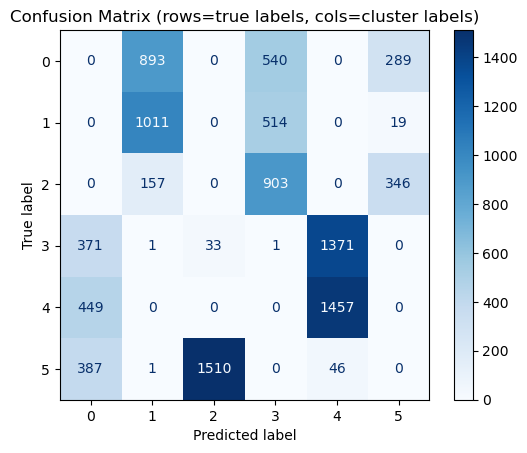

In [86]:
cluster_labels_full = fit_gaussian_mixture(covariance_type="full")
clustering_evaluation(y, cluster_labels_full)

ARI  (Adjusted Rand Index) = 0.5682
NMI (Normalized Mutual Info) = 0.7042
Confusion matrix (klasy vs klaster):
[[   0    0    0    0    0    0    0]
 [   0 1554   14    0  154    0    0]
 [   0 1507   33    0    4    0    0]
 [   0  293  960    0  153    0    0]
 [1654    2    0   34    0   87    0]
 [1899    0    0    7    0    0    0]
 [  54    0    0   53    0 1837    0]]


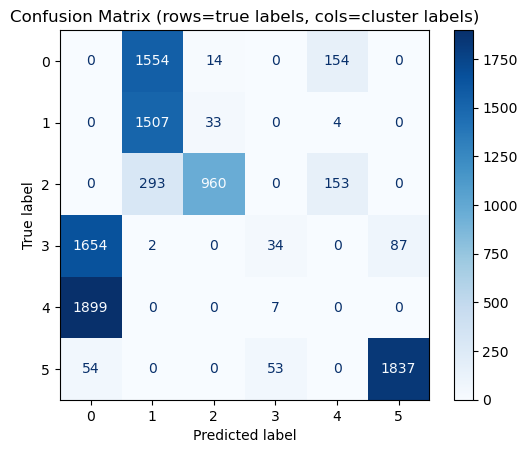

In [87]:
cluster_labels_tied = fit_gaussian_mixture(covariance_type="tied")
clustering_evaluation(y, cluster_labels_tied)

ARI  (Adjusted Rand Index) = 0.3610
NMI (Normalized Mutual Info) = 0.5059
Confusion matrix (klasy vs klaster):
[[   0    0    0    0    0    0    0]
 [1005    0  154  563    0    0    0]
 [1163    0  118  263    0    0    0]
 [ 257    0  254  895    0    0    0]
 [   2  623   53    0 1022   77    0]
 [   4  849   33    0 1020    0    0]
 [   0  551   77    0   31 1285    0]]


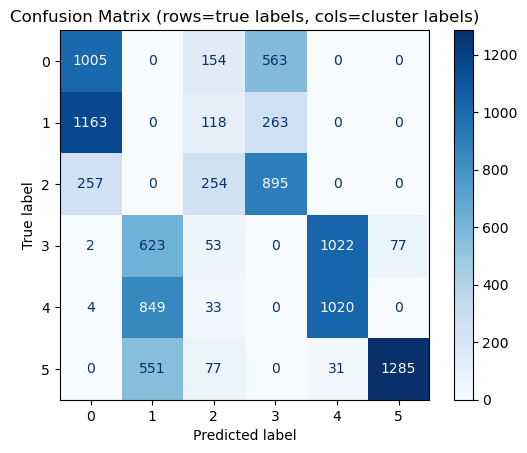

In [88]:
cluster_labels_diag = fit_gaussian_mixture(covariance_type="diag")
clustering_evaluation(y, cluster_labels_diag)

ARI  (Adjusted Rand Index) = 0.3573
NMI (Normalized Mutual Info) = 0.5136
Confusion matrix (klasy vs klaster):
[[   0    0    0    0    0    0    0]
 [ 768    0  158  796    0    0    0]
 [1154    0   88  302    0    0    0]
 [ 244    0  271  891    0    0    0]
 [   2  620   16    0 1029  110    0]
 [   0  833    2    0 1071    0    0]
 [   1  614   41    0   35 1253    0]]


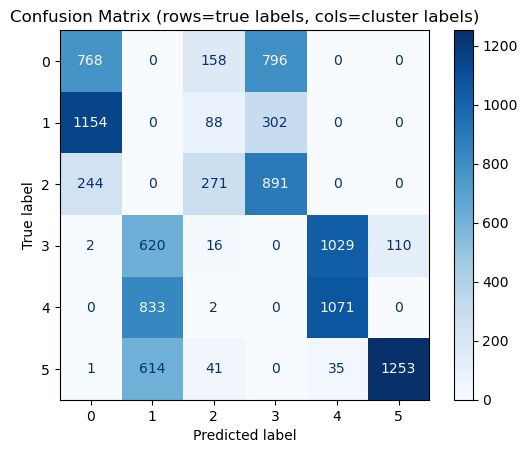

In [89]:
cluster_labels_sph = fit_gaussian_mixture(covariance_type="spherical")
clustering_evaluation(y, cluster_labels_sph)

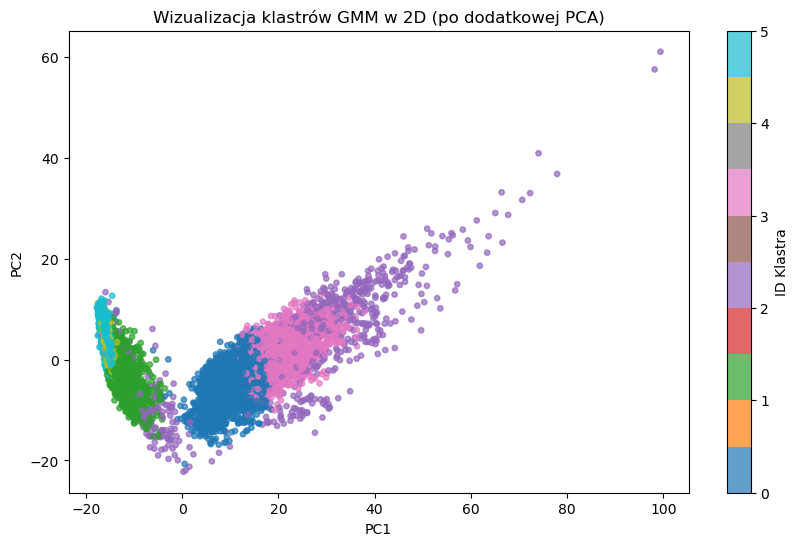

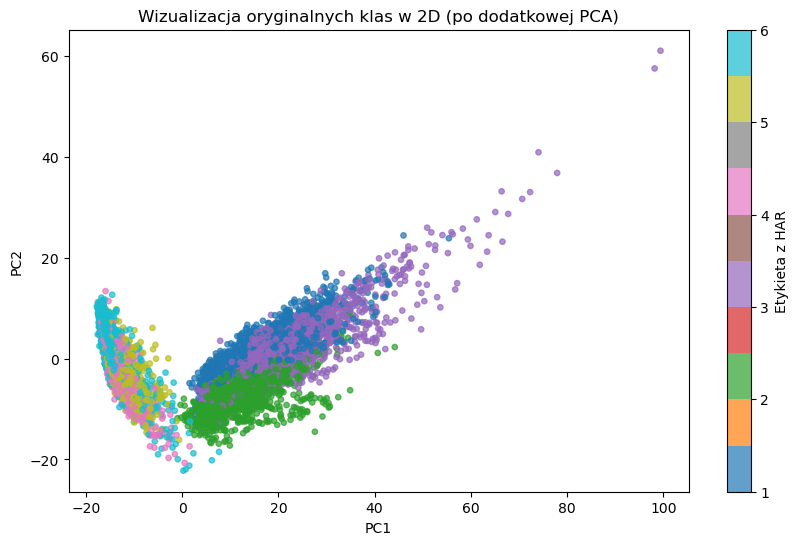

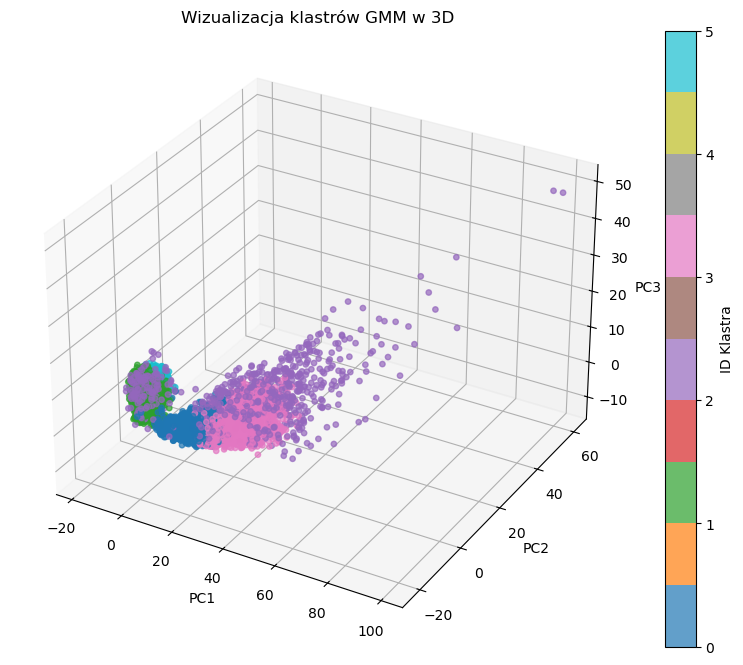

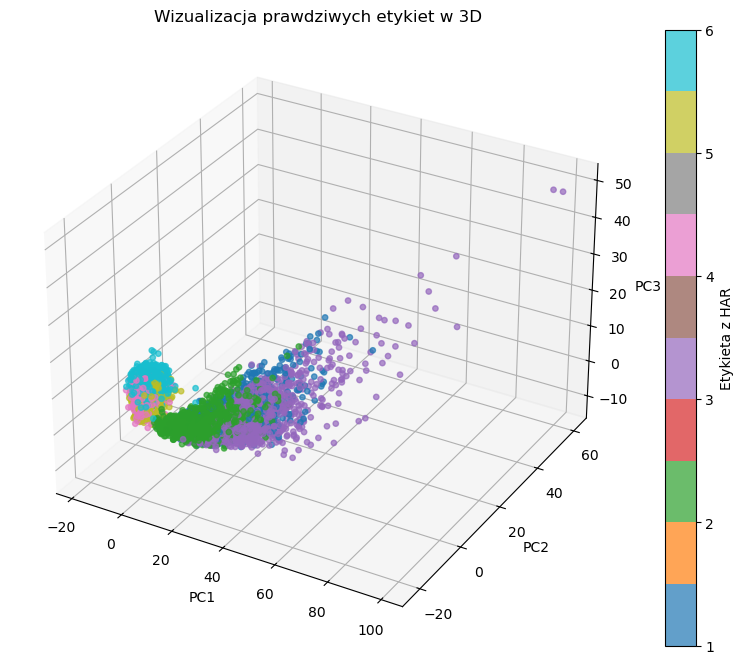

In [90]:
cluster_labels = cluster_labels_diag
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_80)

# Rysujemy punkty w 2D z kolorami klastrów
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='tab10', s=15, alpha=0.7)
plt.title("Wizualizacja klastrów GMM w 2D (po dodatkowej PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='ID Klastra')
plt.show()

# (b) Możemy też pokazać, jak wyglądają punkty w 2D z kolorami prawdziwych etykiet
plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', s=15, alpha=0.7)
plt.title("Wizualizacja oryginalnych klas w 2D (po dodatkowej PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Etykieta z HAR')
plt.show()

# (c) Wizualizacja w 3D (opcjonalnie):
pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(X_80)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=cluster_labels, cmap='tab10', s=15, alpha=0.7)
ax.set_title("Wizualizacja klastrów GMM w 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(sc, label='ID Klastra')
plt.show()

# (d) Analogicznie – 3D z prawdziwymi etykietami
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='tab10', s=15, alpha=0.7)
ax.set_title("Wizualizacja prawdziwych etykiet w 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(sc, label='Etykieta z HAR')
plt.show()

### Wnioski z `GMM`

- Czy potrzeba wszystkich cech?

Pozostałem przy podobnym PCA czyli 80% wariancji, które daje 27 wymiarów.

- Czy potrzebujemy aż dwóch plików? Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?

Użyliśmy GMM do eksploracji danych, więc pozostałem przy danych połączonych. Dodatkowo scaliłem `y` aby zwizualizować klastry `GMM` vs etykiety prawdziwe.

- Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej?

Wyliczone wyniki `ARI = 0.4254` oraz `NMI = 0.5682` wskazują na to iż model nie zgaduje i rozróżnia aktywności bierne od ruchowych, jednakże nie radzi sobie z dokładniejszym ich podzialem.

- Podsumowanie:

Wyniki wizualizacji są dość podobne do `KMeans`. Mimo innej metody klastrowania modele widzą w danych podobne zależności.

# Zadanie końcowe, porównanie działania modeli bez i z klasteryzają jako preprocessing

In [1]:
import numpy as np
import pandas as pd

# Klasy do walidacji i grid search:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Preprocessing:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Klasteryzacja:
from sklearn.cluster import KMeans

# Klasyfikatory:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Pipeline + tworzenie własnych transformerów
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Metryki
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# 1) Wczytanie danych

train_data = pd.read_csv("samsung_train.txt", sep='\s+', header=None)
test_data  = pd.read_csv("samsung_test.txt",  sep='\s+', header=None)

train_labels = pd.read_csv("samsung_train_labels.txt", sep='\s+', header=None)
test_labels  = pd.read_csv("samsung_test_labels.txt",  sep='\s+', header=None)

X_train = train_data.to_numpy()
y_train = train_labels.to_numpy().ravel() - 1
X_test  = test_data.to_numpy()
y_test  = test_labels.to_numpy().ravel() - 1

print("Rozmiar zbioru treningowego:", X_train.shape, y_train.shape)
print("Rozmiar zbioru testowego:    ", X_test.shape,  y_test.shape)

Rozmiar zbioru treningowego: (7352, 561) (7352,)
Rozmiar zbioru testowego:     (2947, 561) (2947,)


In [33]:
# 2) Definicja transformera KMeans - tworzy dodatkową kolumnę z etykietą klastra

class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,
                 n_clusters=5,
                 random_state=42,
                 init='k-means++',
                 n_init=10,
                 algorithm='auto',
                 max_iter=300,
                 tol=1e-4):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.init = init
        self.n_init = n_init
        self.algorithm = algorithm
        self.max_iter = max_iter
        self.tol = tol
        self.kmeans = None

    def fit(self, X, y=None):
        self.kmeans = KMeans(
            n_clusters=self.n_clusters,
            random_state=self.random_state,
            init=self.init,
            n_init=self.n_init,
            algorithm=self.algorithm,
            max_iter=self.max_iter,
            tol=self.tol
        )
        self.kmeans.fit(X)
        return self
    
    def transform(self, X, y=None):
        labels = self.kmeans.predict(X)
        return np.column_stack([X, labels])

In [34]:
# 3) Pipeline bez KMeans

pipeline_no_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', None),
])

# 4) Pipeline z KMeans

pipeline_with_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('kmeans', KMeansTransformer()),
    ('ct', ColumnTransformer(
        transformers=[
            ('onehot_kmeans', OneHotEncoder(), [-1]),
        ],
        remainder='passthrough'
    )),
    ('scalar2', StandardScaler()),
    ('clf', None),
])

In [40]:
# 5) Walidacja krzyżowa

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
# 6) Siatki hiperparametrów

param_grid_rf = {
    # PCA
    'pca__n_components': [0.80, 0.95, 10],
    'clf': [RandomForestClassifier(random_state=42)],
    'clf__n_estimators': [100, 200, 300, 500],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__max_features': ['sqrt', 'log2']
}

param_grid_svm = {
    'pca__n_components': [0.80, 0.95, 10],
    'clf': [SVC(random_state=42)],
    'clf__kernel': ['linear', 'rbf', 'poly'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma': ['scale', 'auto'],
    'clf__degree': [2, 3]
}

param_grid_xgb = {
    'pca__n_components': [0.80, 0.95, 10],
    'clf': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.5, 0.7, 1.0],
    'clf__colsample_bytree': [0.5, 0.7, 1.0]
}

# Jeśli używamy pipeline_with_kmeans:
param_kmeans = {
    'kmeans__n_clusters': [2, 6],
    'kmeans__init': ['k-means++'],
    'kmeans__n_init': [10],
    'kmeans__max_iter': [100],
    'kmeans__tol': [1e-3, 1e-4],
    'kmeans__algorithm': ['lloyd', 'elkan'],
}

In [42]:
# 7) Funkcja do trenowania + testowania modelu

def run_grid_search(pipeline, param_grid, X_tr, y_tr, X_te, y_te, cv):
    """
    Uruchamia GridSearchCV z podanym pipeline (może być z KMeans lub bez) oraz param_grid.
    Zwraca najlepszy model (po dopasowaniu) i wyświetla wyniki.
    """
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_tr, y_tr)

    print("Najlepszy zestaw parametrów:", grid_search.best_params_)
    print("Najlepsze score CV:         ", grid_search.best_score_)
    
    # Ewaluacja na zbiorze testowym
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_te)
    acc_test = accuracy_score(y_te, y_pred)
    report = classification_report(y_te, y_pred, output_dict=True)
    precision_macro = report['macro avg']['precision']
    recall_macro    = report['macro avg']['recall']
    f1_macro        = report['macro avg']['f1-score']

    print("Accuracy na zbiorze testowym:", acc_test)
    print(classification_report(y_te, y_pred))
    
    return best_model, (acc_test, precision_macro, recall_macro, f1_macro)

In [14]:
# 8) Uruchomienie pipeline'ów

results = []

In [15]:
# 8.1) Pipeline bez KMeans Random Forest

print("\n=== [Pipeline BEZ KMeans] RandomForest ===")
best_rf_no_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_no_kmeans,
    param_grid_rf,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'RandomForest',
    'Preprocessing': 'bez KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline BEZ KMeans] RandomForest ===
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Najlepszy zestaw parametrów: {'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': 20, 'clf__max_features': 'log2', 'clf__min_samples_split': 5, 'clf__n_estimators': 500, 'pca__n_components': 0.95}
Najlepsze score CV:          0.9406950706863302
Accuracy na zbiorze testowym: 0.8937902952154734
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       496
           1       0.92      0.93      0.92       471
           2       0.92      0.77      0.84       420
           3       0.89      0.77      0.82       491
           4       0.82      0.95      0.88       532
           5       1.00      0.96      0.98       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



In [17]:
# 8.2) Pipeline bez KMeans SVM

print("\n=== [Pipeline BEZ KMeans] SVM ===")
best_svm_no_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_no_kmeans,
    param_grid_svm,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'SVM',
    'Preprocessing': 'bez KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline BEZ KMeans] SVM ===
Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Najlepszy zestaw parametrów: {'clf': SVC(random_state=42), 'clf__C': 100, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'pca__n_components': 0.95}
Najlepsze score CV:          0.9808202111572026
Accuracy na zbiorze testowym: 0.9423142178486597
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       496
           1       0.91      0.94      0.92       471
           2       0.95      0.90      0.92       420
           3       0.94      0.89      0.91       491
           4       0.91      0.95      0.93       532
           5       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [18]:
# 8.3) Pipeline bez KMeans XGBoost

print("\n=== [Pipeline BEZ KMeans] XGBoost ===")
best_xgb_no_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_no_kmeans,
    param_grid_xgb,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'XGBoost',
    'Preprocessing': 'bez KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline BEZ KMeans] XGBoost ===
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\xgboost\core.py:158: UserWarning: [02:59:34] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Najlepszy zestaw parametrów: {'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...), 'clf__colsample_bytree': 0.5, 'clf__learning_rate': 0.1, 'clf__max_depth': 10, 'clf__n_estimators': 200, 'clf__subsample': 0.5, 'pca__n_components': 0.95}
Najlepsze score CV:          0.964362898116418

In [55]:
#{'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': 20, 'clf__max_features': 'log2', 'clf__min_samples_split': 5, 'clf__n_estimators': 500, 'pca__n_components': 0.95}
print(param_grid_rf)
print(best_rf_no_kmeans.named_steps['clf'])

{'pca__n_components': [0.8, 0.95, 10], 'clf': [RandomForestClassifier(random_state=42)], 'clf__n_estimators': [100, 200, 300, 500], 'clf__max_depth': [None, 5, 10, 20], 'clf__min_samples_split': [2, 5, 10], 'clf__max_features': ['sqrt', 'log2']}
RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=500, random_state=42)


In [56]:
# 9) Pipeline z KMeans
best_param_grid_rf = {
    'pca__n_components': [best_rf_no_kmeans.named_steps['pca'].n_components],
    'clf': [best_rf_no_kmeans.named_steps['clf']],
}

best_param_grid_svm = {
    'pca__n_components': [best_svm_no_kmeans.named_steps['pca'].n_components],
    'clf': [best_svm_no_kmeans.named_steps['clf']],
}

best_param_grid_xgb = {
    'pca__n_components': [best_xgb_no_kmeans.named_steps['pca'].n_components],
    'clf': [best_xgb_no_kmeans.named_steps['clf']],
}
param_grid_rf_with_kmeans  = dict(best_param_grid_rf,  **param_kmeans)
param_grid_svm_with_kmeans = dict(best_param_grid_svm, **param_kmeans)
param_grid_xgb_with_kmeans = dict(best_param_grid_xgb, **param_kmeans)

In [57]:
# 9.1) Pipeline z KMeans Random Forest

print("\n=== [Pipeline Z KMeans] RandomForest ===")
best_rf_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_with_kmeans,
    param_grid_rf_with_kmeans,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'RandomForest',
    'Preprocessing': 'z KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline Z KMeans] RandomForest ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Najlepszy zestaw parametrów: {'clf': RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=500, random_state=42), 'kmeans__algorithm': 'lloyd', 'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 2, 'kmeans__n_init': 10, 'kmeans__tol': 0.001, 'pca__n_components': 0.95}
Najlepsze score CV:          0.9374310594394114
Accuracy na zbiorze testowym: 0.8971835765184933
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       496
           1       0.91      0.92      0.91       471
           2       0.93      0.76      0.84       420
           3       0.89      0.80      0.84       491
           4       0.84      0.94      0.88       532
           5       1.00      0.97      0.98       537

    accuracy                           0.90      2947
   macro avg

In [59]:
# 9.2) Pipeline z KMeans SVM

print("\n=== [Pipeline Z KMeans] SVM ===")
best_svm_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_with_kmeans,
    param_grid_svm_with_kmeans,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'SVM',
    'Preprocessing': 'z KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline Z KMeans] SVM ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Najlepszy zestaw parametrów: {'clf': SVC(C=100, degree=2, random_state=42), 'kmeans__algorithm': 'lloyd', 'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 6, 'kmeans__n_init': 10, 'kmeans__tol': 0.001, 'pca__n_components': 0.95}
Najlepsze score CV:          0.9692585450223596
Accuracy na zbiorze testowym: 0.9331523583305056
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       496
           1       0.97      0.88      0.93       471
           2       0.91      0.96      0.94       420
           3       0.92      0.86      0.89       491
           4       0.89      0.93      0.91       532
           5       0.99      0.99      0.99       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [61]:
# 9.3) Pipeline z KMeans XGBoost

print("\n=== [Pipeline Z KMeans] XGBoost ===")
best_xgb_kmeans, (acc, prec, rec, f1) = run_grid_search(
    pipeline_with_kmeans,
    param_grid_xgb_with_kmeans,
    X_train, y_train,
    X_test, y_test,
    cv
)
results.append({
    'Model': 'XGBoost',
    'Preprocessing': 'z KMeans',
    'Accuracy': acc,
    'Precision(macro)': prec,
    'Recall(macro)': rec,
    'F1(macro)': f1
})


=== [Pipeline Z KMeans] XGBoost ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:40] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Najlepszy zestaw parametrów: {'clf': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...), 'kmeans__algorithm': 'lloyd', 'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 6, 'kmeans__n_init': 10, 'kmeans__tol': 0.0001, 'pca__n_components': 0.95}
Najlepsze scor

In [66]:
# 10) Podsumowanie wyników

df_results = pd.DataFrame(results)
print("\n=== Podsumowanie wyników ===")
display(df_results)


=== Podsumowanie wyników ===


,Model,Preprocessing,Accuracy,Precision(macro),Recall(macro),F1(macro)
0,RandomForest,bez KMeans,0.893790,0.898167,0.889207,0.890574
1,SVM,bez KMeans,0.942314,0.942477,0.940149,0.940896
2,XGBoost,bez KMeans,0.923990,0.926298,0.920529,0.921743
3,RandomForest,z KMeans,0.897184,0.901226,0.892347,0.893863
4,SVM,z KMeans,0.933152,0.933759,0.932648,0.932355
5,XGBoost,z KMeans,0.922633,0.925825,0.918765,0.920117


### Wnioski:

`KMeans` nieznacznie ulepszyło model `RandomForest`, równocześnie jednak miało minimalnie negatywny wpływ na działanie modeli `SVM` i `XGBoost`.
Można więc postawić tezę, że KMeans może poprawić model, ale nie zawsze.

# Pytania o pojęcia:

#### KMeans:

Model używany w uczeniu nienadzorowanym. Jego celem jest klasteryzacja. Grupuje dane w K ilość klastrów. Działa na zasadzie dobrania minimalnej odległości punktów od centroidów, dla których szuka najlepszego ustawienia.

#### K-Fold:

Jest to technika walidacji/oceny modelu. Dzieli on dane na K ilość foldów. Jeden fold używany jest jako dane testowe a pozostałe jako dane treningowe. Sprawdzanie odbywa się na zasadzie iteracji poprzez wszystkie foldy, gdzie za każdym razem innym jest ten testowy. Wynik wszystkich kombinacji jest uśredniany, by uzyskać ocenę modelu.

#### K Nearest Neighbours:

Model używany w uczeniu nadzorowanym. Jego celem jest klasyfikacja lub regresja. Działa na zasadzie przewidzenia wartości/klasy na podstawie podobieństwa do sąsiadów. W danych wyszukuje najbliższych K sąsiadów a potem uśrednia dane dla problemu regresji lub na podstawie głosowania przypisuje klasę.